<h2 style = "color : Brown"> CASE STUDY OF BANK LOAN DECISION MAKING </h2>

In [116]:
# Importing required libraries for overall analysis
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Loading the data file named application.csv

In [117]:
## loading application.csv file to a dataframe named loanapp
loanapp=pd.read_csv(r'C:\Users\bharg\Downloads\application_data.csv')

In [118]:
## checking how the dataframe looks
loanapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
## getting the information about the dataframe created above
loanapp.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [120]:
## describing the dataframe
loanapp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [121]:
# checking the data types of all columns
loanapp.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

## Checking Null values percentage

In [122]:
#checking null value percentage of 0-30 columns
loanapp.iloc[:,0:30].isnull().sum()/len(loanapp)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000


In [123]:
#checking null value percentage of 30-60 columns
loanapp.iloc[:,30:60].isnull().sum()/len(loanapp)*100

REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_CITY_NOT_LIVE_CITY          0.000000
REG_CITY_NOT_WORK_CITY          0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
ORGANIZATION_TYPE               0.000000
EXT_SOURCE_1                   56.381073
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   19.825307
APARTMENTS_AVG                 50.749729
BASEMENTAREA_AVG               58.515956
YEARS_BEGINEXPLUATATION_AVG    48.781019
YEARS_BUILD_AVG                66.497784
COMMONAREA_AVG                 69.872297
ELEVATORS_AVG                  53.295980
ENTRANCES_AVG                  50.348768
FLOORSMAX_AVG                  49.760822
FLOORSMIN_AVG                  67.848630
LANDAREA_AVG                   59.376738
LIVINGAPARTMENTS

In [124]:
#checking null value percentage of 60-90 columns
loanapp.iloc[:,60:90].isnull().sum()/len(loanapp)*100

YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59.376738
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAREA_MODE                 50.193326
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAREA_MODE              55.179164
APARTMENTS_MEDI                 50.749729
BASEMENTAREA_MEDI               58.515956
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BUILD_MEDI                66.497784
COMMONAREA_MEDI                 69.872297
ELEVATORS_MEDI                  53.295980
ENTRANCES_MEDI                  50.348768
FLOORSMAX_MEDI                  49.760822
FLOORSMIN_MEDI                  67.848630
LANDAREA_MEDI                   59.376738
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAREA_MEDI                 50

In [125]:
#checking null value percentage of 90-122 columns
loanapp.iloc[:,90:122].isnull().sum()/len(loanapp)*100

EMERGENCYSTATE_MODE           47.398304
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000
FLAG_DOCUMENT_4                0.000000
FLAG_DOCUMENT_5                0.000000
FLAG_DOCUMENT_6                0.000000
FLAG_DOCUMENT_7                0.000000
FLAG_DOCUMENT_8                0.000000
FLAG_DOCUMENT_9                0.000000
FLAG_DOCUMENT_10               0.000000
FLAG_DOCUMENT_11               0.000000
FLAG_DOCUMENT_12               0.000000
FLAG_DOCUMENT_13               0.000000
FLAG_DOCUMENT_14               0.000000
FLAG_DOCUMENT_15               0.000000
FLAG_DOCUMENT_16               0.000000
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_20               0.000000


In [126]:
#Checking the number of columns with null value percentage more than 30
appempty=loanapp.isnull().sum()
appempty=appempty[appempty.values>(0.3*len(loanapp))]
len(appempty)

50

In [127]:
# Checking the null value percentage for each column after dropping columns with more than 30% null values
appempty=list(appempty[appempty.values>0.3].index)
loanapp.drop(labels=appempty,axis=1,inplace=True)
loanapp.isnull().sum()/len(loanapp)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 72, dtype: float64

In [128]:
# Getting all the names of columns after dropping the columns with null values more than 30%
loanapp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [129]:
#Imputing the null values of the column named AMT_ANNUITY by its median
loanapp.AMT_ANNUITY=loanapp.AMT_ANNUITY.fillna(loanapp['AMT_ANNUITY'].median())

In [130]:
loanapp.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 72, dtype: int64

In [131]:
# Checking for wrong data in wrong column
loanapp[loanapp.CNT_FAM_MEMBERS.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [132]:
#List of non_relevant columns
nonrelevant=['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [133]:
#Checking the number of non-relevant columns
len(nonrelevant)

30

In [134]:
#Dropping non_relevant columns from the main dataframe
loanapp.drop(labels=nonrelevant,axis=1,inplace=True)
loanapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [135]:
#Checking how the dataframe looks after performing all above mentioned operations
loanapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
loanapp.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',

### Checking for undefined values in different columns

In [137]:
#Checking for undefined values in column named CODE_GENDER
loanapp.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [138]:
#Imputing the undefined value of the column CODE_GENDER with F as the number is too less
loanapp.loc[loanapp['CODE_GENDER']=='XNA']='F'
loanapp.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [139]:
loanapp.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29275
F                       4
Name: NAME_CONTRACT_TYPE, dtype: int64

In [140]:
loanapp.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
F                                     4
Name: NAME_EDUCATION_TYPE, dtype: int64

In [141]:
loanapp.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
F                            4
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [142]:
loanapp.NAME_FAMILY_STATUS=loanapp.NAME_FAMILY_STATUS.apply(lambda x: x.replace('/','or'))

In [143]:
loanapp.NAME_FAMILY_STATUS.value_counts()

Married                  196429
Single or not married     45444
Civil marriage            29774
Separated                 19770
Widow                     16088
F                             4
Unknown                       2
Name: NAME_FAMILY_STATUS, dtype: int64

In [144]:
loanapp.NAME_HOUSING_TYPE.value_counts()

House / apartment      272865
With parents            14840
Municipal apartment     11182
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
F                           4
Name: NAME_HOUSING_TYPE, dtype: int64

In [145]:
loanapp.NAME_HOUSING_TYPE=loanapp.NAME_HOUSING_TYPE.apply(lambda x: x.replace('/','or'))

In [146]:
loanapp.NAME_INCOME_TYPE.value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
F                            4
Name: NAME_INCOME_TYPE, dtype: int64

In [147]:
loanapp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [148]:
loanapp=loanapp[~(loanapp.ORGANIZATION_TYPE=='XNA')]

In [149]:
loanapp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11192
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6879
Construction               6721
Business Entity Type 1     5983
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3277
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [150]:
loanapp.REG_CITY_NOT_LIVE_CITY.value_counts()

0    229499
1     22634
F         4
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [151]:
loanapp.loc[loanapp.REG_CITY_NOT_LIVE_CITY=='F']=0

In [152]:
loanapp.REG_CITY_NOT_LIVE_CITY.value_counts()

0    229503
1     22634
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64

In [153]:
#Converting columns to numeric
ncs=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']
loanapp[ncs]=loanapp[ncs].apply(pd.to_numeric)
loanapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,2,2,2,0,0,0,0,0,1
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,0,1,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [154]:
# Converting '-ve' values into '+ve' Values
loanapp['DAYS_BIRTH'] = loanapp['DAYS_BIRTH'].abs()
loanapp['DAYS_EMPLOYED'] = loanapp['DAYS_EMPLOYED'].abs()
loanapp['DAYS_REGISTRATION'] = loanapp['DAYS_REGISTRATION'].abs()
loanapp['DAYS_ID_PUBLISH'] = loanapp['DAYS_ID_PUBLISH'].abs()

In [155]:
#Converting number of days of birth and employed into years 
#by considering average days of a year as 365 
loanapp.DAYS_BIRTH=loanapp.DAYS_BIRTH.values/365
loanapp.DAYS_EMPLOYED=loanapp.DAYS_EMPLOYED.values/365

In [156]:
incomebins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
incomeslots = ['0-25000','25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000','375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
loanapp['Income_range']=pd.cut(loanapp['AMT_INCOME_TOTAL'],bins=incomebins,labels=incomeslots)

In [157]:
loanapp.Income_range.value_counts()

125000-150000       39818
200000-225000       35993
100000-125000       34851
75000,100000        29612
150000-175000       29295
175000-200000       25892
50000-75000         12077
250000-275000       11485
225000-250000        6482
300000-325000        6169
350000-375000        4185
275000-300000        3749
425000-450000        2863
500000 and above     2543
25000-50000          1982
325000-350000        1952
400000-425000        1652
375000-400000        1132
475000-500000         282
450000-475000         119
0-25000                 0
Name: Income_range, dtype: int64

In [158]:
creditbins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
creditslots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000','800000-850000','850000-900000','900000 and above']

loanapp['CREDIT_RANGE'] = pd.cut(loanapp.AMT_CREDIT,bins=creditbins,labels=creditslots)

In [159]:
loanapp.CREDIT_RANGE.value_counts()

900000 and above    50717
250000-300000       24960
500000-550000       18433
200000-250000       17502
400000-450000       15853
150000-200000       14867
0-150000            13502
300000-350000       13487
650000-700000       12142
450000-500000       11254
750000-800000        9770
550000-600000        9489
800000-850000        9439
850000-900000        9100
350000-400000        8398
600000-650000        7571
700000-750000        5649
Name: CREDIT_RANGE, dtype: int64

In [160]:
#Checking value counts for TARGET variable
loanapp.TARGET.value_counts()

0    230302
1     21835
Name: TARGET, dtype: int64

# Univariate analysis

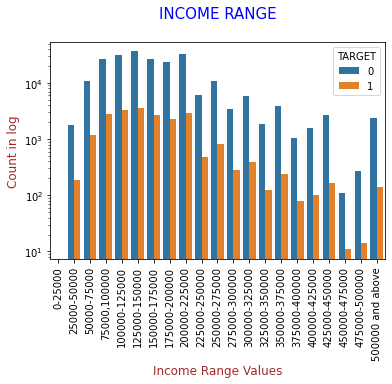

In [161]:
#Checking which income range of people are mostly applying for loans
sns.countplot(loanapp.Income_range, hue=loanapp.TARGET)
plt.yscale('log')
plt.ylabel("Count in log", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("Income Range Values", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=90)
plt.title('INCOME RANGE\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

####  Inference 1.1
- From the above plot we can infer that the maximum number of clients without payment difficulties lie in the income range  1.2lac-1.5lac and immediate next income range is 2lac-.25 lac
- Most clients wiht payment difficulties lie in the income range is 4.5lac-4.75lac

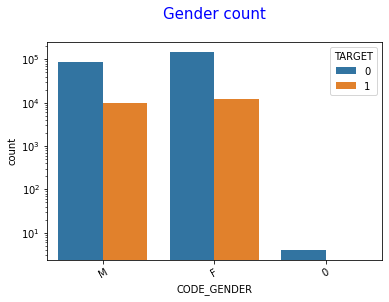

In [162]:
#plotting CODE_GENDER values 
sns.countplot(loanapp.CODE_GENDER,hue=loanapp.TARGET)
plt.yscale('log')
plt.xticks(rotation=30)
plt.title('Gender count\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

####  Inference 1.2
-  It can be seen that both number of males and females is same for having payment difficulties
-  It can also be seen that number of females is more than males for not having payment dificulties

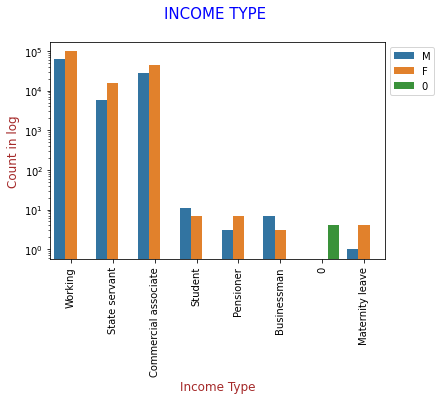

In [163]:
#plotting NAME_INCOME_TYPE values in a horizontal bar graph
sns.countplot(loanapp.NAME_INCOME_TYPE,hue=loanapp.CODE_GENDER)
plt.yscale('log')
plt.ylabel("Count in log", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=90)
plt.xlabel("Income Type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('INCOME TYPE \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Inference 1.3
- We can conclude that most clients who fall in working type income category are applying for loans

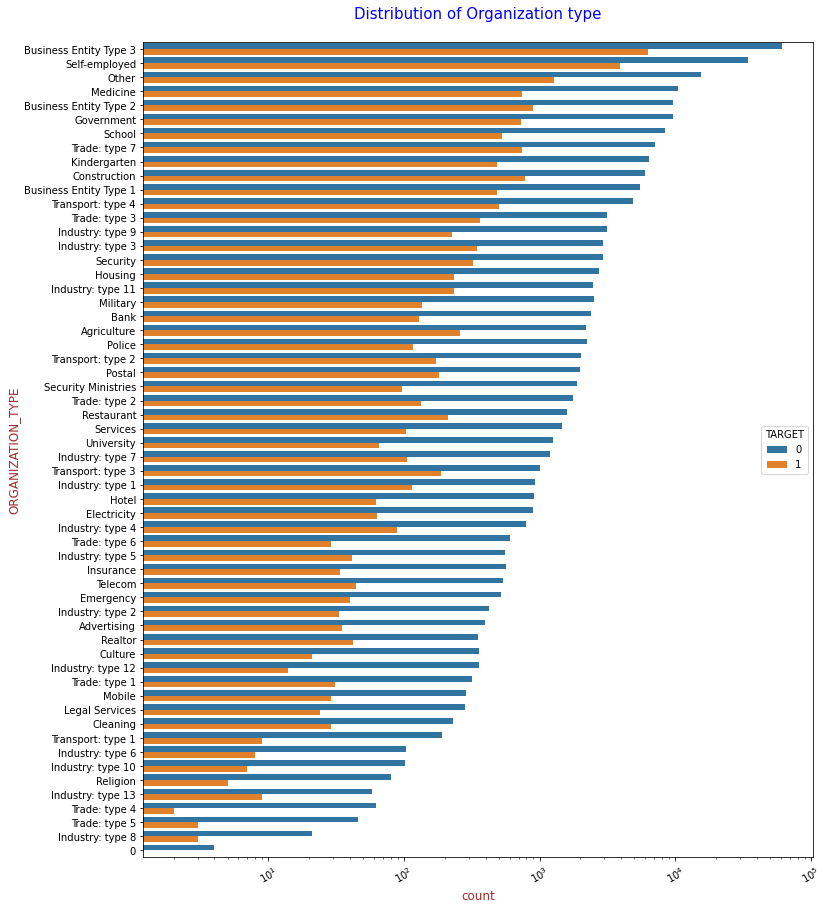

In [164]:
#Plotting countplot for checking what organisation type people are applying for loans 
# and are getting the loans actually
plt.figure(figsize=(12,15))
plt.xticks(rotation=30)
plt.xscale('log')
plt.ylabel("ORGANIZATION_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel('count', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Distribution of Organization type\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=loanapp,y='ORGANIZATION_TYPE',order=loanapp['ORGANIZATION_TYPE'].value_counts().index,hue='TARGET')
plt.show()

#### Inference 1.4
- It can be seen that Trade: type 4, organisation type have least count of payment difficulty clients
- Most clients with no payment difficulties lie in organsation type named Business Entity Type 3

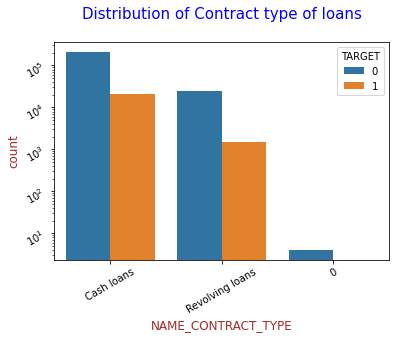

In [165]:
#Checking which contract type of loans more applications are pouring in for..
plt.xticks(rotation=90)
plt.yscale('log')
plt.xlabel("CONTRACT_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.ylabel("Count in log", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xticks(rotation=30)
plt.title('Distribution of Contract type of loans\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=loanapp,x='NAME_CONTRACT_TYPE',order=loanapp.NAME_CONTRACT_TYPE.value_counts().index, hue=loanapp.TARGET)
plt.show()

#### Inference 1.5
- Most cash loans applicants don't have payment difficulties
- The same type of loans also have the most applicants with payment difficulties

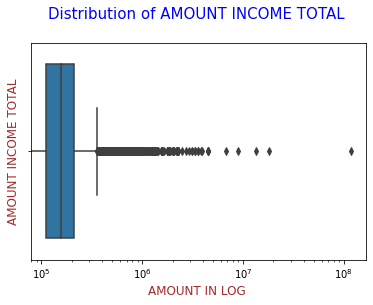

In [166]:
#Checking for outliers in AMT_INCOME_TOTAL in target0 dataframe
sns.boxplot(loanapp.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.xlabel("AMOUNT IN LOG ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMOUNT INCOME TOTAL", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Distribution of AMOUNT INCOME TOTAL \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

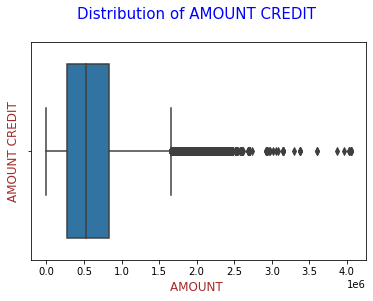

In [167]:
#Checking outliers for Credit Amount
sns.boxplot(loanapp.AMT_CREDIT)
plt.xlabel("AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMOUNT CREDIT", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Distribution of AMOUNT CREDIT \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

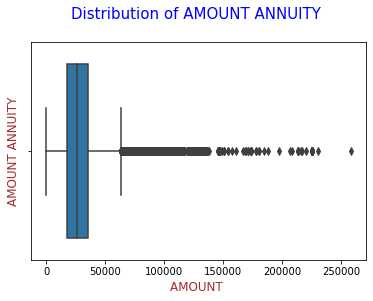

In [168]:
#Checking outliers for Credit Amount
sns.boxplot(loanapp.AMT_ANNUITY)
plt.xlabel("AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("AMOUNT ANNUITY", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Distribution of AMOUNT ANNUITY \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

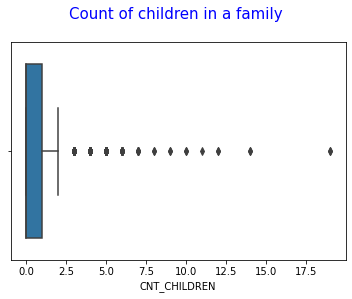

In [169]:
#Checking the count of children in each family
sns.boxplot(loanapp.CNT_CHILDREN)
plt.title('Count of children in a family \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

- It can be seen in the above boxplot that the count of children column clearly has outliers that are to be dealt with 

In [170]:
#Dropping rows with unrealistic data for children count
loanapp=loanapp[~(loanapp.CNT_CHILDREN>=6)]

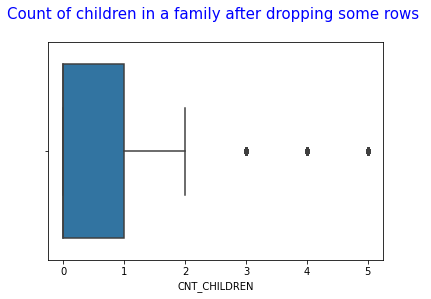

In [171]:
sns.boxplot(loanapp.CNT_CHILDREN)
plt.title('Count of children in a family after dropping some rows \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

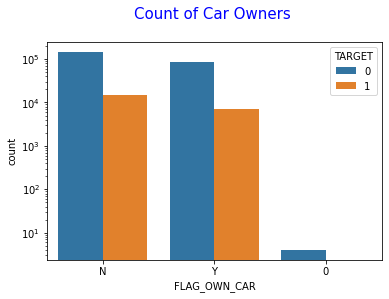

In [172]:
#Checking count of car owners with their capabilities to make a payment 
sns.countplot(loanapp.FLAG_OWN_CAR, hue=loanapp.TARGET)
plt.yscale('log')
plt.title('Count of Car Owners \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

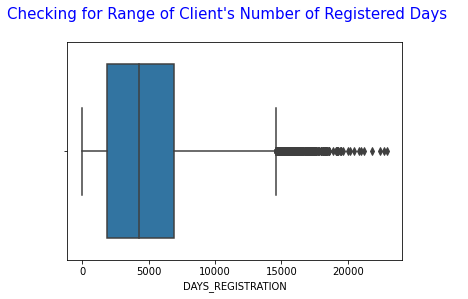

In [173]:
#Checking for outliers for the column DAYS_REGISTRATION
sns.boxplot(loanapp.DAYS_REGISTRATION)
plt.title("Checking for Range of Client's Number of Registered Days   \n",fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

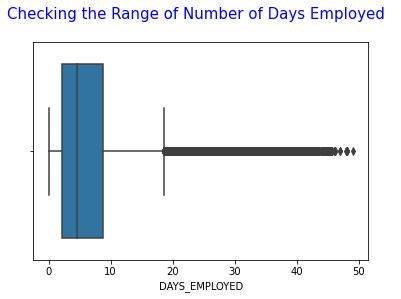

In [174]:
#Checking for outliers in column named DAYS_EMPLOYED
sns.boxplot(loanapp.DAYS_EMPLOYED)
plt.title('Checking the Range of Number of Days Employed  \n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

In [175]:
#dropping rows with more than 40 years of emplyed duration
loanapp=loanapp[~(loanapp.DAYS_EMPLOYED>=40)]

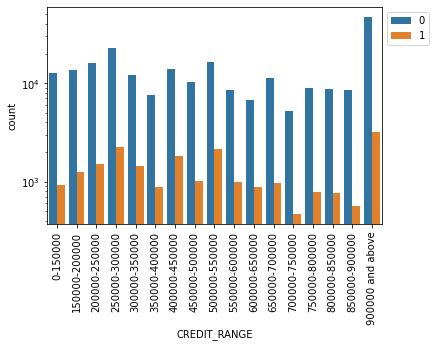

In [176]:
#Checking for Credit range that clients are getting that are likely to pay and not pay 
sns.countplot(loanapp.CREDIT_RANGE, hue=loanapp.TARGET)
plt.xticks(rotation=90)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

#### Inference 1.6
- Clients with credit range lying in 900000 and above are the ones who are capable of paying the loans back
- Least number of clients lying in income range 7lac- 7.5 lac are not capable of paying

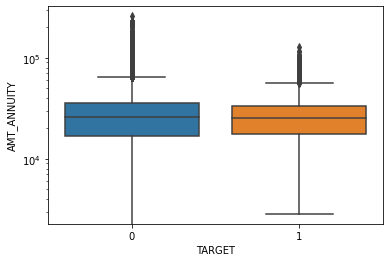

In [177]:
#Checking for annuity amount for  Target variable
sns.boxplot(data=loanapp, x='TARGET',y="AMT_ANNUITY")
plt.yscale('log')
plt.show()

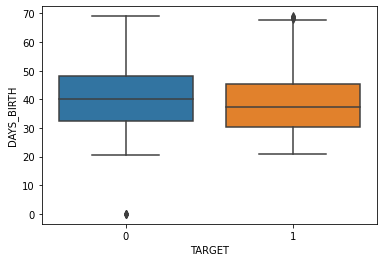

In [178]:
sns.boxplot(data=loanapp, x='TARGET', y='DAYS_BIRTH')
plt.show()

In [179]:
#Dropping row with DAYS_BIRTH=0
loanapp=loanapp[~(loanapp.DAYS_BIRTH==0)]

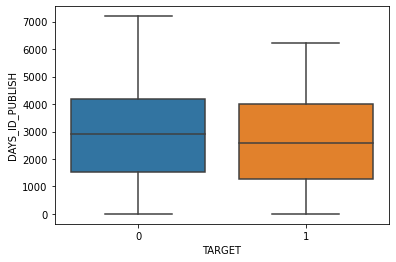

In [180]:
sns.boxplot(data=loanapp, x='TARGET', y='DAYS_ID_PUBLISH')
plt.show()

#### Creating and Checking shape of new dataframes namely target0 & target1

In [181]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0=loanapp.loc[loanapp["TARGET"]==0]
target1=loanapp.loc[loanapp["TARGET"]==1]

In [182]:
target0.shape 

(230035, 44)

In [183]:
target1.shape

(21825, 44)

In [184]:
# Checking the balance ratio of the dataframes created above
round(len(target0)/len(target1),2)

10.54

#### BIVARIATE ANALYSIS

###### For Dataframe named target0

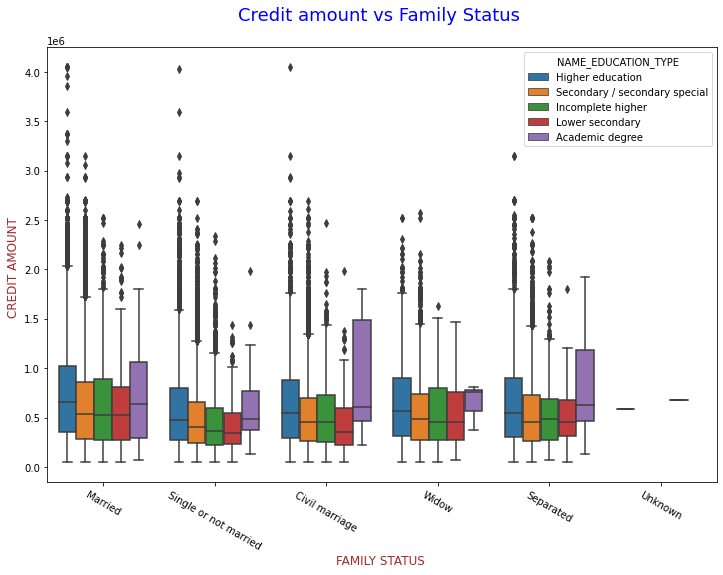

In [185]:
#Checking for Credit amount provided to the customers based on their Family type
#and plotted according their Eduaction status
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target0,x=target0.NAME_FAMILY_STATUS,y=target0.AMT_CREDIT,hue=target0.NAME_EDUCATION_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("FAMILY STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("CREDIT AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.title('Credit amount vs Family Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.7
- Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
- Also, higher education of family status of 'marriage', 'single or not' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

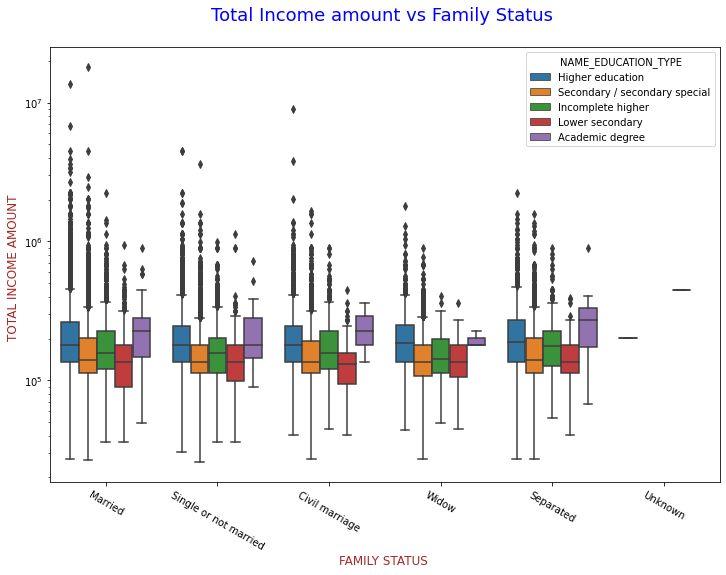

In [186]:
#Checking for Income amount of the customers based on their Family type 
#and plotted according their Education status
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target0,x=target0.NAME_FAMILY_STATUS,y=target0.AMT_INCOME_TOTAL,hue=target0.NAME_EDUCATION_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("FAMILY STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("TOTAL INCOME AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Total Income amount vs Family Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.8
- Family status of 'civil marriage', 'marriage' and 'separated' of Higher education are having higher number of income than others.
- Also, higher education and secondary/second special education statuses with family status of 'marriage', 'single or not' and 'civil marriage' are having more outliers. Married for Higher education is having most of the incomes in the lower bound.

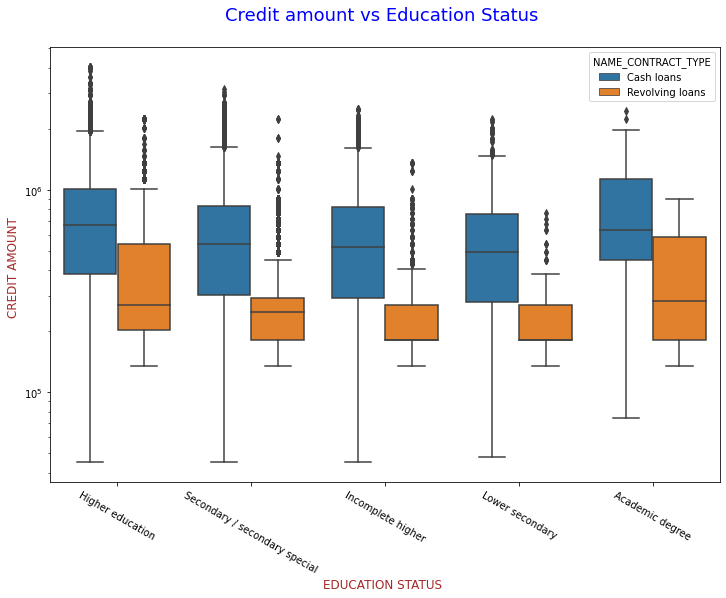

In [187]:
#Checking for Credit amount provided to the customers based on their education 
#and plotted according the Contract types of loans they are applying for.
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target0,x=target0.NAME_EDUCATION_TYPE,y=target0.AMT_CREDIT,hue=target0.NAME_CONTRACT_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("EDUCATION STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("CREDIT AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Credit amount vs Education Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.9
- Education status of higher education and secondary/secondary special have most clients for contract type cash loans
- Most number of clients applying for revolving loans are in education status Acadamic degree and higher education

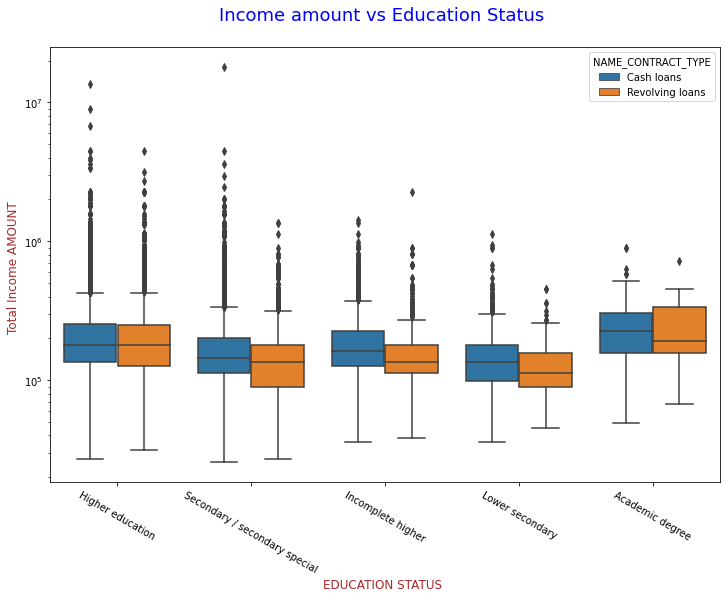

In [188]:
#Checking for Income amount provided to the customers based on their education 
#and plotted according the Contract types of loans they are applying for.
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target0,x=target0.NAME_EDUCATION_TYPE,y=target0.AMT_INCOME_TOTAL,hue=target0.NAME_CONTRACT_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("EDUCATION STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total Income AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Income amount vs Education Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.10
- It can be seen that the clients with education status of Higher education are the maximum credit seekers with highest in terms of contract type of cash loans of contract type
- It can also be observed that the contract type revolving loans issued maximum credit amount holders education status Higher education
- The hightest credit amount in cash loans is given to a client with education level secondary/secondary special
- basically education level or type is not playing much role as of who gets what amount of credit 

###### For Dataframe named target1

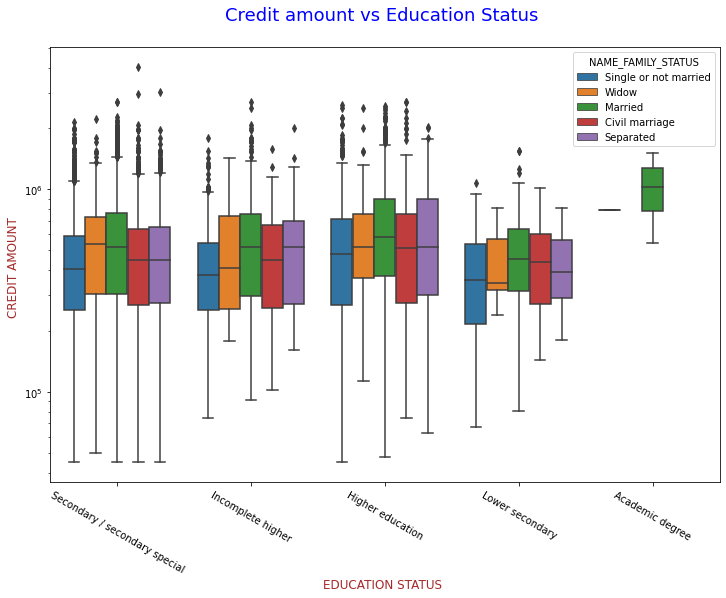

In [189]:
#Checking for Credit amount provided to the customers based on their education 
#and plotted according their family status
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target1,x=target1.NAME_EDUCATION_TYPE,y=target1.AMT_CREDIT,hue=target1.NAME_FAMILY_STATUS)
plt.xticks(rotation=-30)
plt.xlabel("EDUCATION STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("CREDIT AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Credit amount vs Education Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.11
- Observations are Quite similar with Target 0
- Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are --having less number of credits than others.
- Most of the outliers are from Education type 'Higher education' and 'Secondary'.
- Most number of all types of education as well as family lie in lower bound

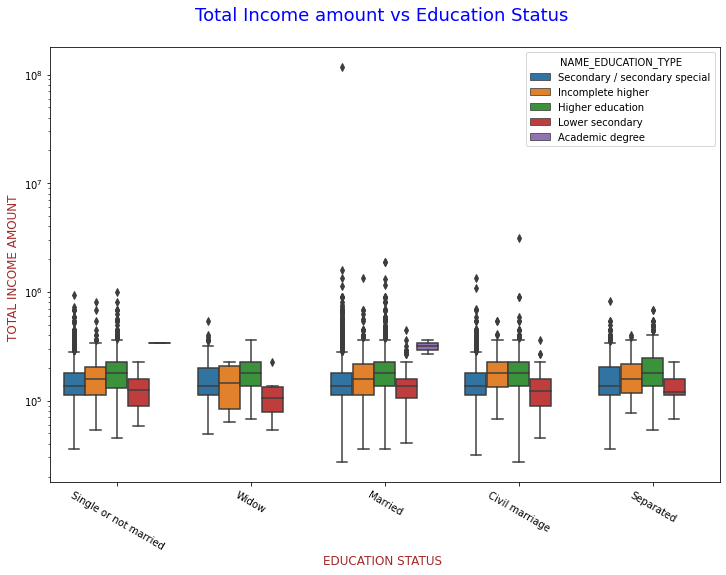

In [190]:
#Checking for Income amount of the customers based on their education 
#and plotted according their family status
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target1,x=target1.NAME_FAMILY_STATUS,y=target1.AMT_INCOME_TOTAL,hue=target1.NAME_EDUCATION_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("EDUCATION STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("TOTAL INCOME AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Total Income amount vs Education Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.12
- This is also having some similarity with target0,
-  Almost all Family types and education types have the income amount mostly equal.
- Least outlies are for Lower scondary and their income amount is also little lesser than that of all other education types.
- Academic degree are very less number of people in payments with diffuclt dataframe named target1

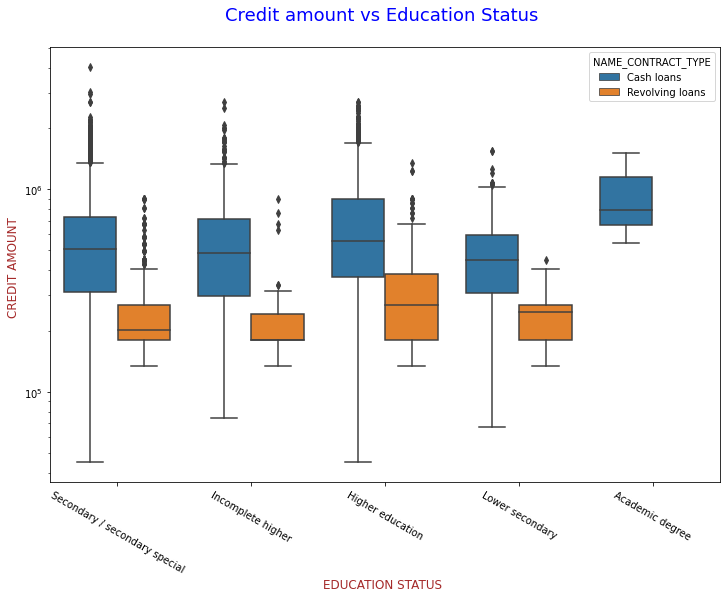

In [191]:
#Checking for Credit amount provided to the customers based on their education 
#and plotted according the Contract types of loans they are applying for.
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target1,x=target1.NAME_EDUCATION_TYPE,y=target1.AMT_CREDIT,hue=target1.NAME_CONTRACT_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("EDUCATION STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("CREDIT AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Credit amount vs Education Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.13
- Its similar to that of inference 1.10
- Even though people have difficulties with payments, loan application are still pouring in with similar credit amount demands from the clients

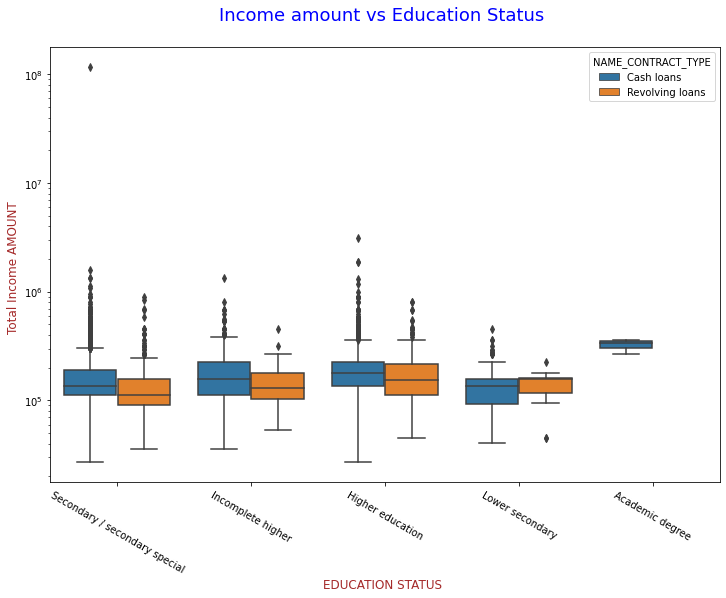

In [192]:
#Checking for Income amount provided to the customers based on their education 
#and plotted according the Contract types of loans they are applying for.
plt.figure(figsize=(12,8))
scale_factor=5
sns.boxplot(data=target1,x=target1.NAME_EDUCATION_TYPE,y=target1.AMT_INCOME_TOTAL,hue=target1.NAME_CONTRACT_TYPE)
plt.xticks(rotation=-30)
plt.xlabel("EDUCATION STATUS ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Total Income AMOUNT ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yscale('log')
plt.title('Income amount vs Education Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.show()

#### Inference 1.14
- It can be seen that the maximum income amount holders are with education levels secondary and higher educatin levels
- its strange that, there are no revolving amount loans are demanded by clients with educatin level acadamic degree  

#### Multivariate Analysis

#### For dataframe named target0

In [193]:
#Creating a correlation table between all the variables of targeto dataframe
target0_correlation=target0.iloc[:,2:].corr()
target0_correlation

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.009520,-0.018341,-0.007230,-0.030413,-0.243544,-0.060577,-0.163671,0.119374,-0.033077,-0.006965,-0.001709,0.010171,0.018408
AMT_INCOME_TOTAL,-0.009520,1.000000,0.326133,0.400719,0.169297,0.045670,0.030587,-0.034520,0.026492,0.055977,0.121312,-0.004236,-0.020241,-0.011232
AMT_CREDIT,-0.018341,0.326133,1.000000,0.762089,0.103810,0.153124,0.088772,0.015122,0.034928,0.040391,0.052104,-0.037519,-0.038467,-0.014770
AMT_ANNUITY,-0.007230,0.400719,0.762089,1.000000,0.122181,0.091765,0.053097,-0.009890,0.025958,0.034020,0.071717,-0.018869,-0.028878,-0.014180
REGION_POPULATION_RELATIVE,-0.030413,0.169297,0.103810,0.122181,1.000000,0.041108,-0.009270,0.059668,0.003932,0.174753,0.092390,-0.053684,-0.049381,-0.016968
DAYS_BIRTH,-0.243544,0.045670,0.153124,0.091765,0.041108,1.000000,0.346573,0.297753,0.106397,-0.048861,-0.013782,-0.165387,-0.112026,-0.030586
DAYS_EMPLOYED,-0.060577,0.030587,0.088772,0.053097,-0.009270,0.346573,1.000000,0.168827,0.082981,-0.022900,-0.063128,-0.112346,-0.125653,-0.074200
DAYS_REGISTRATION,-0.163671,-0.034520,0.015122,-0.009890,0.059668,0.297753,0.168827,1.000000,0.028946,0.031545,-0.009115,-0.047033,-0.054907,-0.031041
DAYS_ID_PUBLISH,0.119374,0.026492,0.034928,0.025958,0.003932,0.106397,0.082981,0.028946,1.000000,-0.005564,-0.008797,-0.053259,-0.032777,-0.001504
HOUR_APPR_PROCESS_START,-0.033077,0.055977,0.040391,0.034020,0.174753,-0.048861,-0.022900,0.031545,-0.005564,1.000000,0.057692,0.010741,-0.001446,-0.005055


- The above chart provides correlation of different variables for clients with no payment difficulties

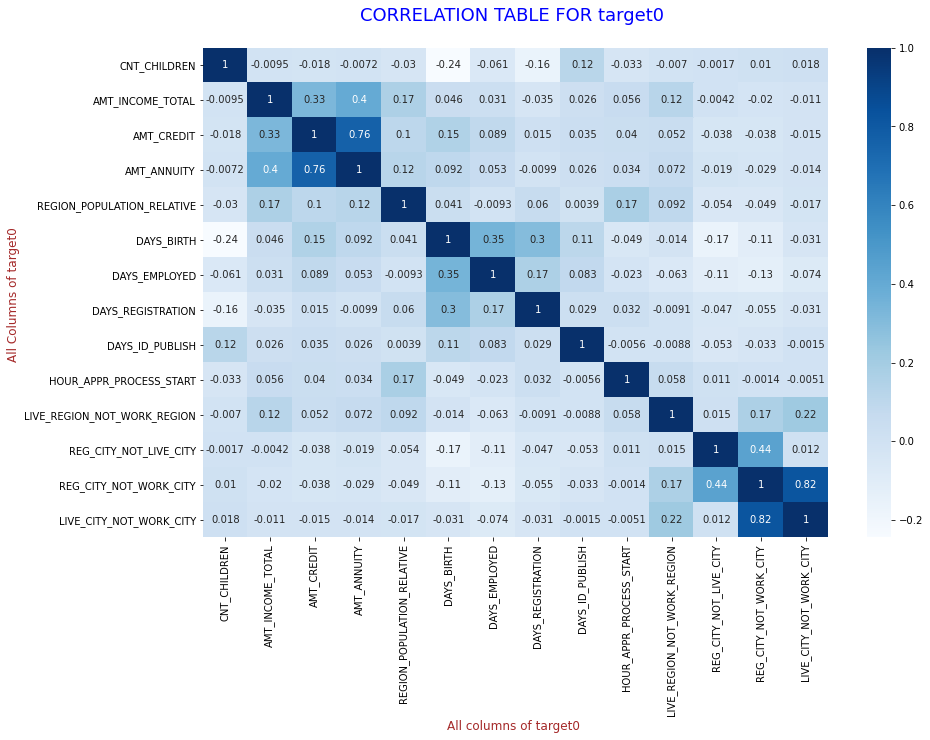

In [231]:
#plotting the correlation table of all variables of target0 dataframe
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(target0_correlation,cmap='Blues',annot=True)
plt.title('CORRELATION TABLE FOR target0 \n',fontdict={'fontsize':18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("All columns of target0 ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("All Columns of target0 ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

#### Inference 1.15
###### MOST  RELEVANT CORRELATIONAL PAIRS with no difficulties of payment
- It is observed that the maximum correlation is between the variables listed below in pairs 
    1. AMT_CREDIT to AMT_ANNUITY
    2. AMT_CREDIT to AMT_TOTAL_INCOME
    3. AMT_ANNUITY to AMT_INCOME_TOTAL
    4. REG_CITY_NOT_WORK_CITY to REG_CITY_NOT_LIVE_CITY
    5. DAYS_EMPLOYED to DAYS_BIRTH
    6. DAYS_BIRTH to DAYS_REGISTRATION	
- Least or negative correlation is between the variables listed below in pairs
    1. DAYS_BIRTH to CNT_CHILDREN
    

#### For dataframe named target1

In [195]:
#Creating a correlation table between all the variables of targeto dataframe
target1_correlation=target1.iloc[:,2:].corr()
target1_correlation

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,0.001788,-0.002617,0.014573,-0.030570,-0.180874,-0.034245,-0.129047,0.091455,-0.042440,-0.027695,-0.018231,-0.001373,0.015323
AMT_INCOME_TOTAL,0.001788,1.000000,0.036475,0.043365,0.008472,0.007811,0.000028,0.003963,0.008851,0.012503,0.012289,-0.003661,-0.006904,-0.004422
AMT_CREDIT,-0.002617,0.036475,1.000000,0.748753,0.069145,0.189365,0.105434,0.032709,0.062444,0.028988,0.036001,-0.035286,-0.041394,-0.017894
AMT_ANNUITY,0.014573,0.043365,0.748753,1.000000,0.074471,0.090409,0.048683,-0.014716,0.044298,0.022418,0.061670,-0.013753,-0.019618,-0.006727
REGION_POPULATION_RELATIVE,-0.030570,0.008472,0.069145,0.074471,1.000000,0.049924,0.015516,0.055662,0.011898,0.144345,0.050747,-0.060471,-0.053638,-0.018881
DAYS_BIRTH,-0.180874,0.007811,0.189365,0.090409,0.049924,1.000000,0.306582,0.240637,0.135613,-0.035131,-0.000418,-0.142309,-0.096523,-0.012114
DAYS_EMPLOYED,-0.034245,0.000028,0.105434,0.048683,0.015516,0.306582,1.000000,0.135285,0.096458,-0.000375,-0.054478,-0.113370,-0.134603,-0.071019
DAYS_REGISTRATION,-0.129047,0.003963,0.032709,-0.014716,0.055662,0.240637,0.135285,1.000000,0.049769,0.048147,-0.000679,-0.028639,-0.049005,-0.028873
DAYS_ID_PUBLISH,0.091455,0.008851,0.062444,0.044298,0.011898,0.135613,0.096458,0.049769,1.000000,-0.008842,-0.002657,-0.047779,-0.016150,0.014987
HOUR_APPR_PROCESS_START,-0.042440,0.012503,0.028988,0.022418,0.144345,-0.035131,-0.000375,0.048147,-0.008842,1.000000,0.051919,0.005252,0.005157,0.003090


- The above chart provides correlation of different variables for clients with payment difficulties

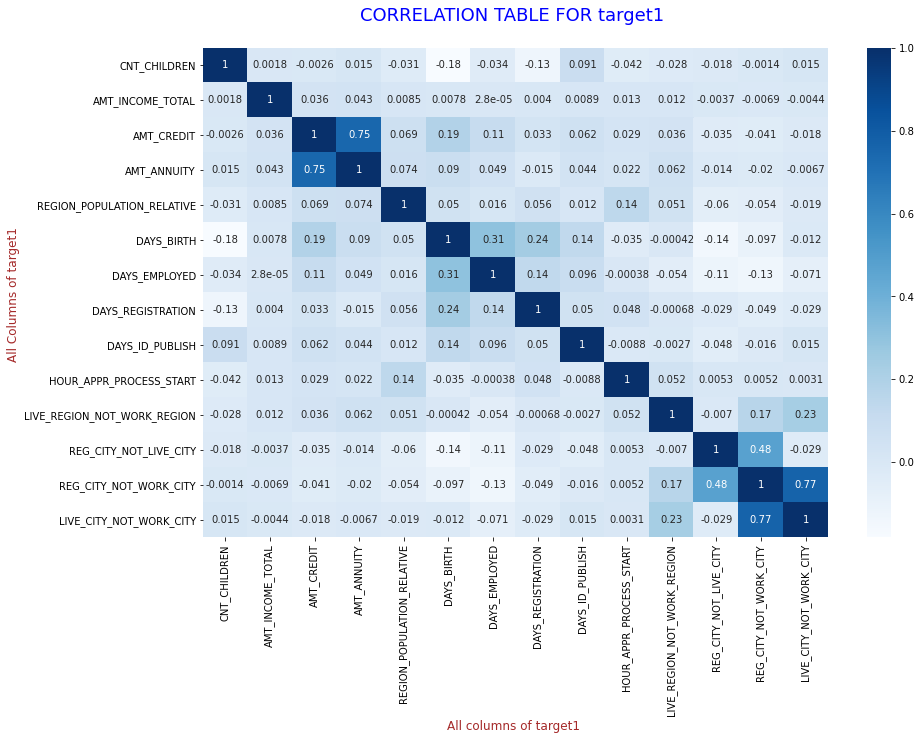

In [230]:
#plotting the correlation table of all variables of target1 dataframe
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(target1_correlation, cmap='Blues',annot=True)
plt.title('CORRELATION TABLE FOR target1 \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("All columns of target1 ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("All Columns of target1 ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

#### Inference 1.16
- Almost all of the correlational pais of variables are as same as in Inference 1.15

## Loading the data file named previous_application.csv

In [197]:
preloanapp=pd.read_csv(r'C:\Users\bharg\Downloads\previous_application.csv')
preloanapp.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
preloanapp.shape

(1670214, 37)

In [199]:
preloanapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [200]:
preloanapp.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [201]:
preloanapp.isnull().sum()/len(preloanapp)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [202]:
#Checking the number of columns with null value percentage more than 40
appempty1=preloanapp.isnull().sum()
appempty1=appempty1[appempty1.values>(0.4*len(preloanapp))]
len(appempty1)

11

In [203]:
preloanapp=preloanapp.drop(appempty1.index, axis=1)

In [204]:
preloanapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

## Merging the two dataframes created for further analysis

In [205]:
#Merging the two dataframes created above
mergedloandf=loanapp.merge(preloanapp,on='SK_ID_CURR')

In [206]:
#Checking how the merged dataframe looks like
mergedloandf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [207]:
#Finding information about the combined dataframe
mergedloandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138854 entries, 0 to 1138853
Data columns (total 69 columns):
 #   Column                        Non-Null Count    Dtype   
---  ------                        --------------    -----   
 0   SK_ID_CURR                    1138854 non-null  object  
 1   TARGET                        1138854 non-null  int64   
 2   NAME_CONTRACT_TYPE_x          1138854 non-null  object  
 3   CODE_GENDER                   1138854 non-null  object  
 4   FLAG_OWN_CAR                  1138854 non-null  object  
 5   FLAG_OWN_REALTY               1138854 non-null  object  
 6   CNT_CHILDREN                  1138854 non-null  int64   
 7   AMT_INCOME_TOTAL              1138854 non-null  float64 
 8   AMT_CREDIT_x                  1138854 non-null  float64 
 9   AMT_ANNUITY_x                 1138854 non-null  float64 
 10  AMT_GOODS_PRICE_x             1137775 non-null  object  
 11  NAME_TYPE_SUITE               1135945 non-null  object  
 12  NAME_INCOME_TY

In [208]:
#Renaming the columns as convention
mergedloandf = mergedloandf.rename({'NAME_CONTRACT_TYPE_x' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_x':'AMT_CREDIT','AMT_ANNUITY_x':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_x' : 'WEEKDAY_APPR_PROCESS_START','AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE',
                         'HOUR_APPR_PROCESS_START_x':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPE_y':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDIT_y':'AMT_CREDIT_PREV','AMT_ANNUITY_y':'AMT_ANNUITY_PREV','AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                         'WEEKDAY_APPR_PROCESS_START_y':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_START_y':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [209]:
#Droppng the non relevant columns of the dataframe
mergedloandf.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [210]:
mergedloandf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1138854 entries, 0 to 1138853
Data columns (total 56 columns):
 #   Column                      Non-Null Count    Dtype   
---  ------                      --------------    -----   
 0   TARGET                      1138854 non-null  int64   
 1   NAME_CONTRACT_TYPE          1138854 non-null  object  
 2   CODE_GENDER                 1138854 non-null  object  
 3   FLAG_OWN_CAR                1138854 non-null  object  
 4   FLAG_OWN_REALTY             1138854 non-null  object  
 5   CNT_CHILDREN                1138854 non-null  int64   
 6   AMT_INCOME_TOTAL            1138854 non-null  float64 
 7   AMT_CREDIT                  1138854 non-null  float64 
 8   AMT_ANNUITY                 1138854 non-null  float64 
 9   AMT_GOODS_PRICE             1137775 non-null  object  
 10  NAME_TYPE_SUITE             1135945 non-null  object  
 11  NAME_INCOME_TYPE            1138854 non-null  object  
 12  NAME_EDUCATION_TYPE         1138854 non-nu

In [211]:
#Checking for null value percentage
mergedloandf.isnull().sum()/len(mergedloandf)*100

TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.094744
NAME_TYPE_SUITE                0.255432
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
ORGANIZATION_TYPE              0.000000
EXT_SOURCE_2                   0.120033
EXT_SOURCE_3                  17.026151
OBS_30_CNT_SOCIAL_CIRCLE       0.224700
DEF_30_CNT_SOCIAL_CIRCLE       0.224700


#### Univariate analsis on merged dataframe

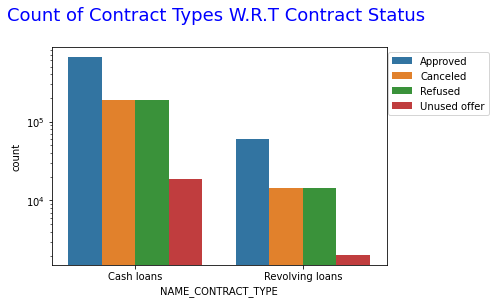

In [212]:
#Plotting a coutplot to check which Contract types are most with respect to Contract status 
sns.countplot(mergedloandf.NAME_CONTRACT_TYPE,hue=mergedloandf.NAME_CONTRACT_STATUS)
plt.title('Count of Contract Types W.R.T Contract Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

#### Inference 2.1
- Contract type cash loans are maximum in number where all kinds of contract statuses are more than contract type revolving loans

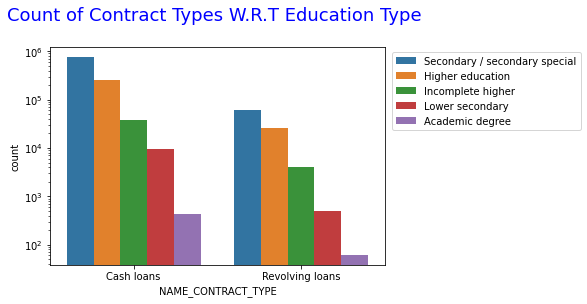

In [213]:
#Checking for count of Contract types with respect to Education type
sns.countplot(mergedloandf.NAME_CONTRACT_TYPE,hue=mergedloandf.NAME_EDUCATION_TYPE)
plt.title('Count of Contract Types W.R.T Education Type \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.6,1))
plt.show()

#### Inference 2.2 
- Most clients with all kinds of education types apply mostly for cash loans rather than revolving loans 

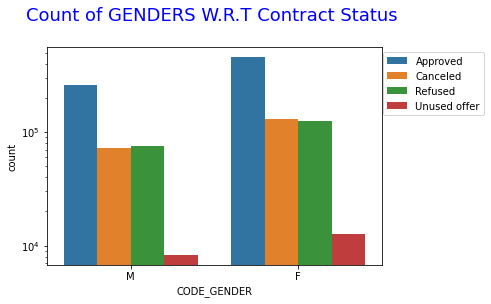

In [214]:
# Checking the count of Gender with respect to Contract Status
sns.countplot(mergedloandf.CODE_GENDER,hue=mergedloandf.NAME_CONTRACT_STATUS)
plt.yscale('log')
plt.title('Count of GENDERS W.R.T Contract Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.legend(bbox_to_anchor=(1.32,1))
plt.show()

#### Inference 2.3
- Maximum approved loans are for female clients
- It can also be observed that male clients use most of the offers of loans as unused offers are very less for male clients than that of female clients

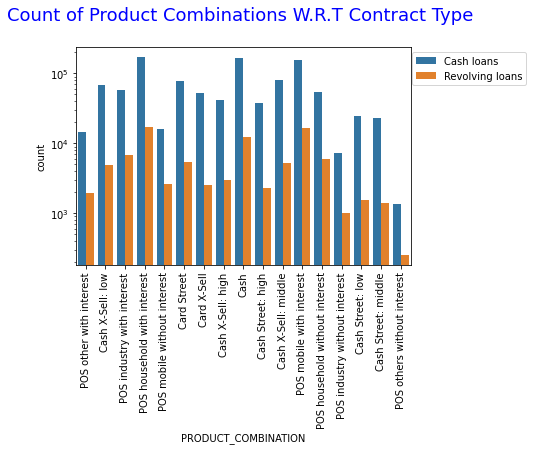

In [215]:
#Checkng the Product combination with respect to Type of contract 
sns.countplot(mergedloandf.PRODUCT_COMBINATION,hue=mergedloandf.NAME_CONTRACT_TYPE)
plt.yscale('log')
plt.title('Count of Product Combinations W.R.T Contract Type \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.legend(bbox_to_anchor=(1.36,1))
plt.xticks(rotation=90)
plt.show()

#### Inference 2.4
- Maximum number of contract types are of Product combination of POS household with interest followed by Cash and then followed by POS mobile with interest
- Least number of clients opt for product combination of POS others without interest 

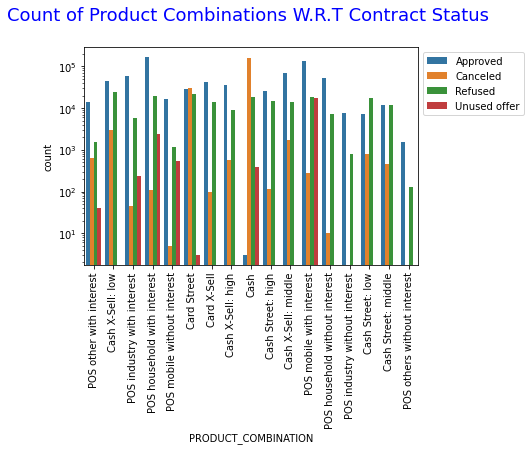

In [216]:
#Checking Product combination with respect to Status of the Contract
sns.countplot(mergedloandf.PRODUCT_COMBINATION,hue=mergedloandf.NAME_CONTRACT_STATUS)
plt.yscale('log')
plt.title('Count of Product Combinations W.R.T Contract Status \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(rotation=90)
plt.show()

#### Inference 2.5
- Most canceled laons are of the product combination, Cash.
- Most refused loans are of product combination Cash X-Sell: low
- There are almost nill unused offers in product combinations listed below
     1. Cash X-Sell: low
     2. Card X-Sell
     3. Card X-Sell: high
     4. Cash Street: high
     5. POS household with interest
     6. Cash Street: middle
     7. Cash X-Sell: middle
     8. Cash Street: low
- Some product combiations are nill incase of unused offers as well as cancelled loans
     1. POS industry without interest
     2. POS others without interest

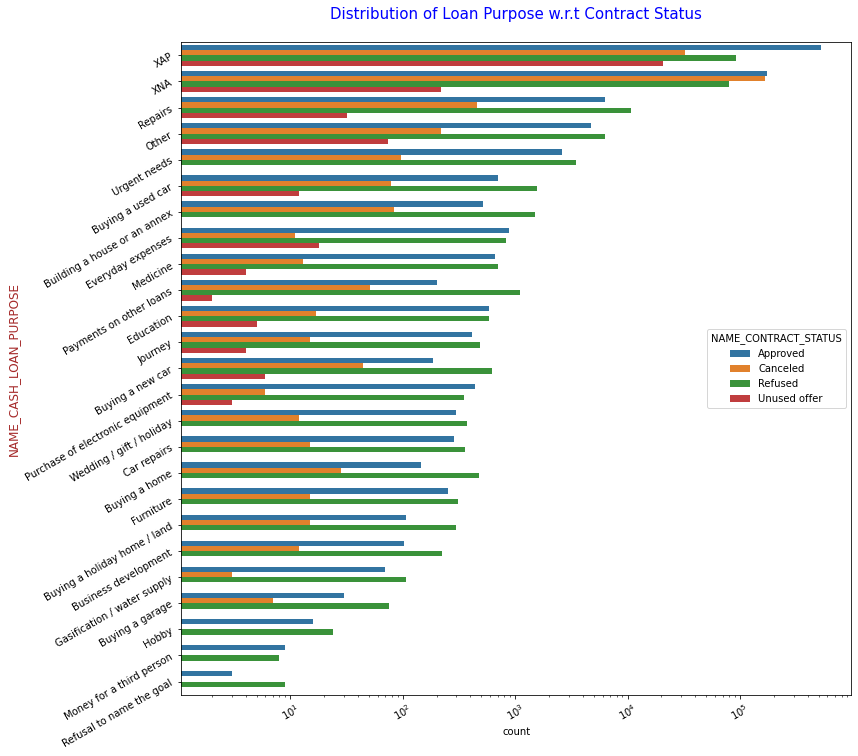

In [217]:
#Plotting countplot for checking what loan purpose people are applying for loans 
# and are actually getting the loans 
plt.figure(figsize=(12,12))
plt.xticks(rotation=30)
plt.xscale('log')
plt.ylabel("NAME_CONTRACT_STATUS", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.title('Distribution of Loan Purpose w.r.t Contract Status\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=mergedloandf,y='NAME_CASH_LOAN_PURPOSE',order=mergedloandf['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.show()

#### Inference 2.6
- Most rejection of loans came from purpose 'repairs'.
- For education purposes we have equal number of approves
- Rejection for Paying other loans and buying a new car are having significant higher rejection than approves.

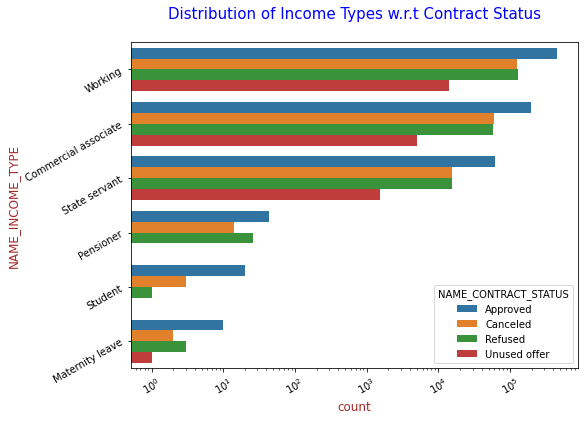

In [218]:
#Plotting countplot for checking which types of incomes of people are applying for loans 
# and are actually getting the loans
plt.figure(figsize=(8,6))
plt.xticks(rotation=30)
plt.xscale('log')
plt.ylabel("NAME_INCOME_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.title('Distribution of Income Types w.r.t Contract Status\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=mergedloandf,y='NAME_INCOME_TYPE',order=mergedloandf['NAME_INCOME_TYPE'].value_counts().index,hue='NAME_CONTRACT_STATUS')
plt.show()

#### Inference 2.7
- There are no nused offers for students and pensioners
- The number of approved loans for state servants is almost equal to the refusal or canceled loans for Commercial associates
- Maximum unused offers is by working clients

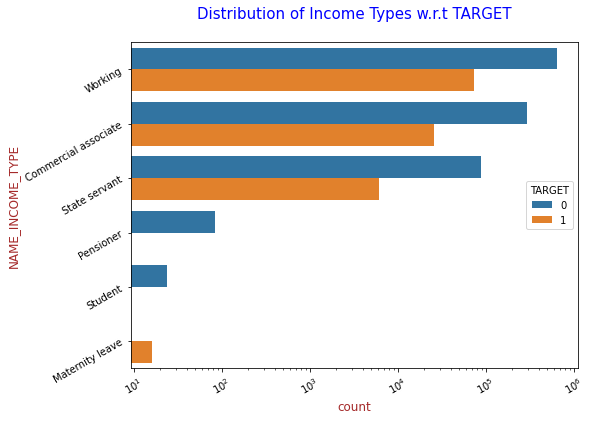

In [219]:
#Plotting countplot for checking which types of incomes of people are applying for loans 
# and are actually capable of paying back the loans
plt.figure(figsize=(8,6))
plt.xticks(rotation=30)
plt.xscale('log')
plt.ylabel("NAME_INCOME_TYPE", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.title('Distribution of Income Types w.r.t TARGET\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=mergedloandf,y='NAME_INCOME_TYPE',order=mergedloandf['NAME_INCOME_TYPE'].value_counts().index,hue='TARGET')
plt.show()

#### Inference 2.8
- There are no clients with payment difficulties who are students and pensioners
- There are no clients on maternity leave with no payment difficulties

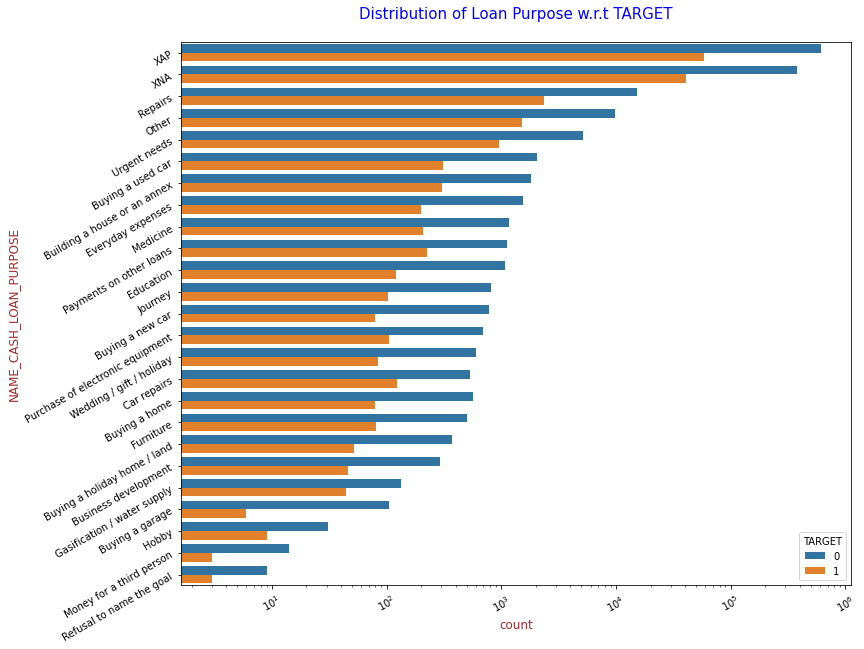

In [220]:
#Plotting countplot for checking what loan purpose people are applying for loans 
# and are actually capable of paying back 
plt.figure(figsize=(12,10))
plt.xticks(rotation=30)
plt.xscale('log')
plt.ylabel('NAME_CASH_LOAN_PURPOSE', fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.title('Distribution of Loan Purpose w.r.t TARGET\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
sns.countplot(data=mergedloandf,y='NAME_CASH_LOAN_PURPOSE',order=mergedloandf.NAME_CASH_LOAN_PURPOSE.value_counts().index,hue='TARGET')
plt.show()

#### Inference 2.9
- Loan purposes with 'Repairs' are facing more difficulties in payment. 
- There are few places where loan payment is significantly higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'. 
- Hence we can focus on these purposes for which the client is having minimal payment difficulties.

#### Bivariate Analysis on merged dataframe

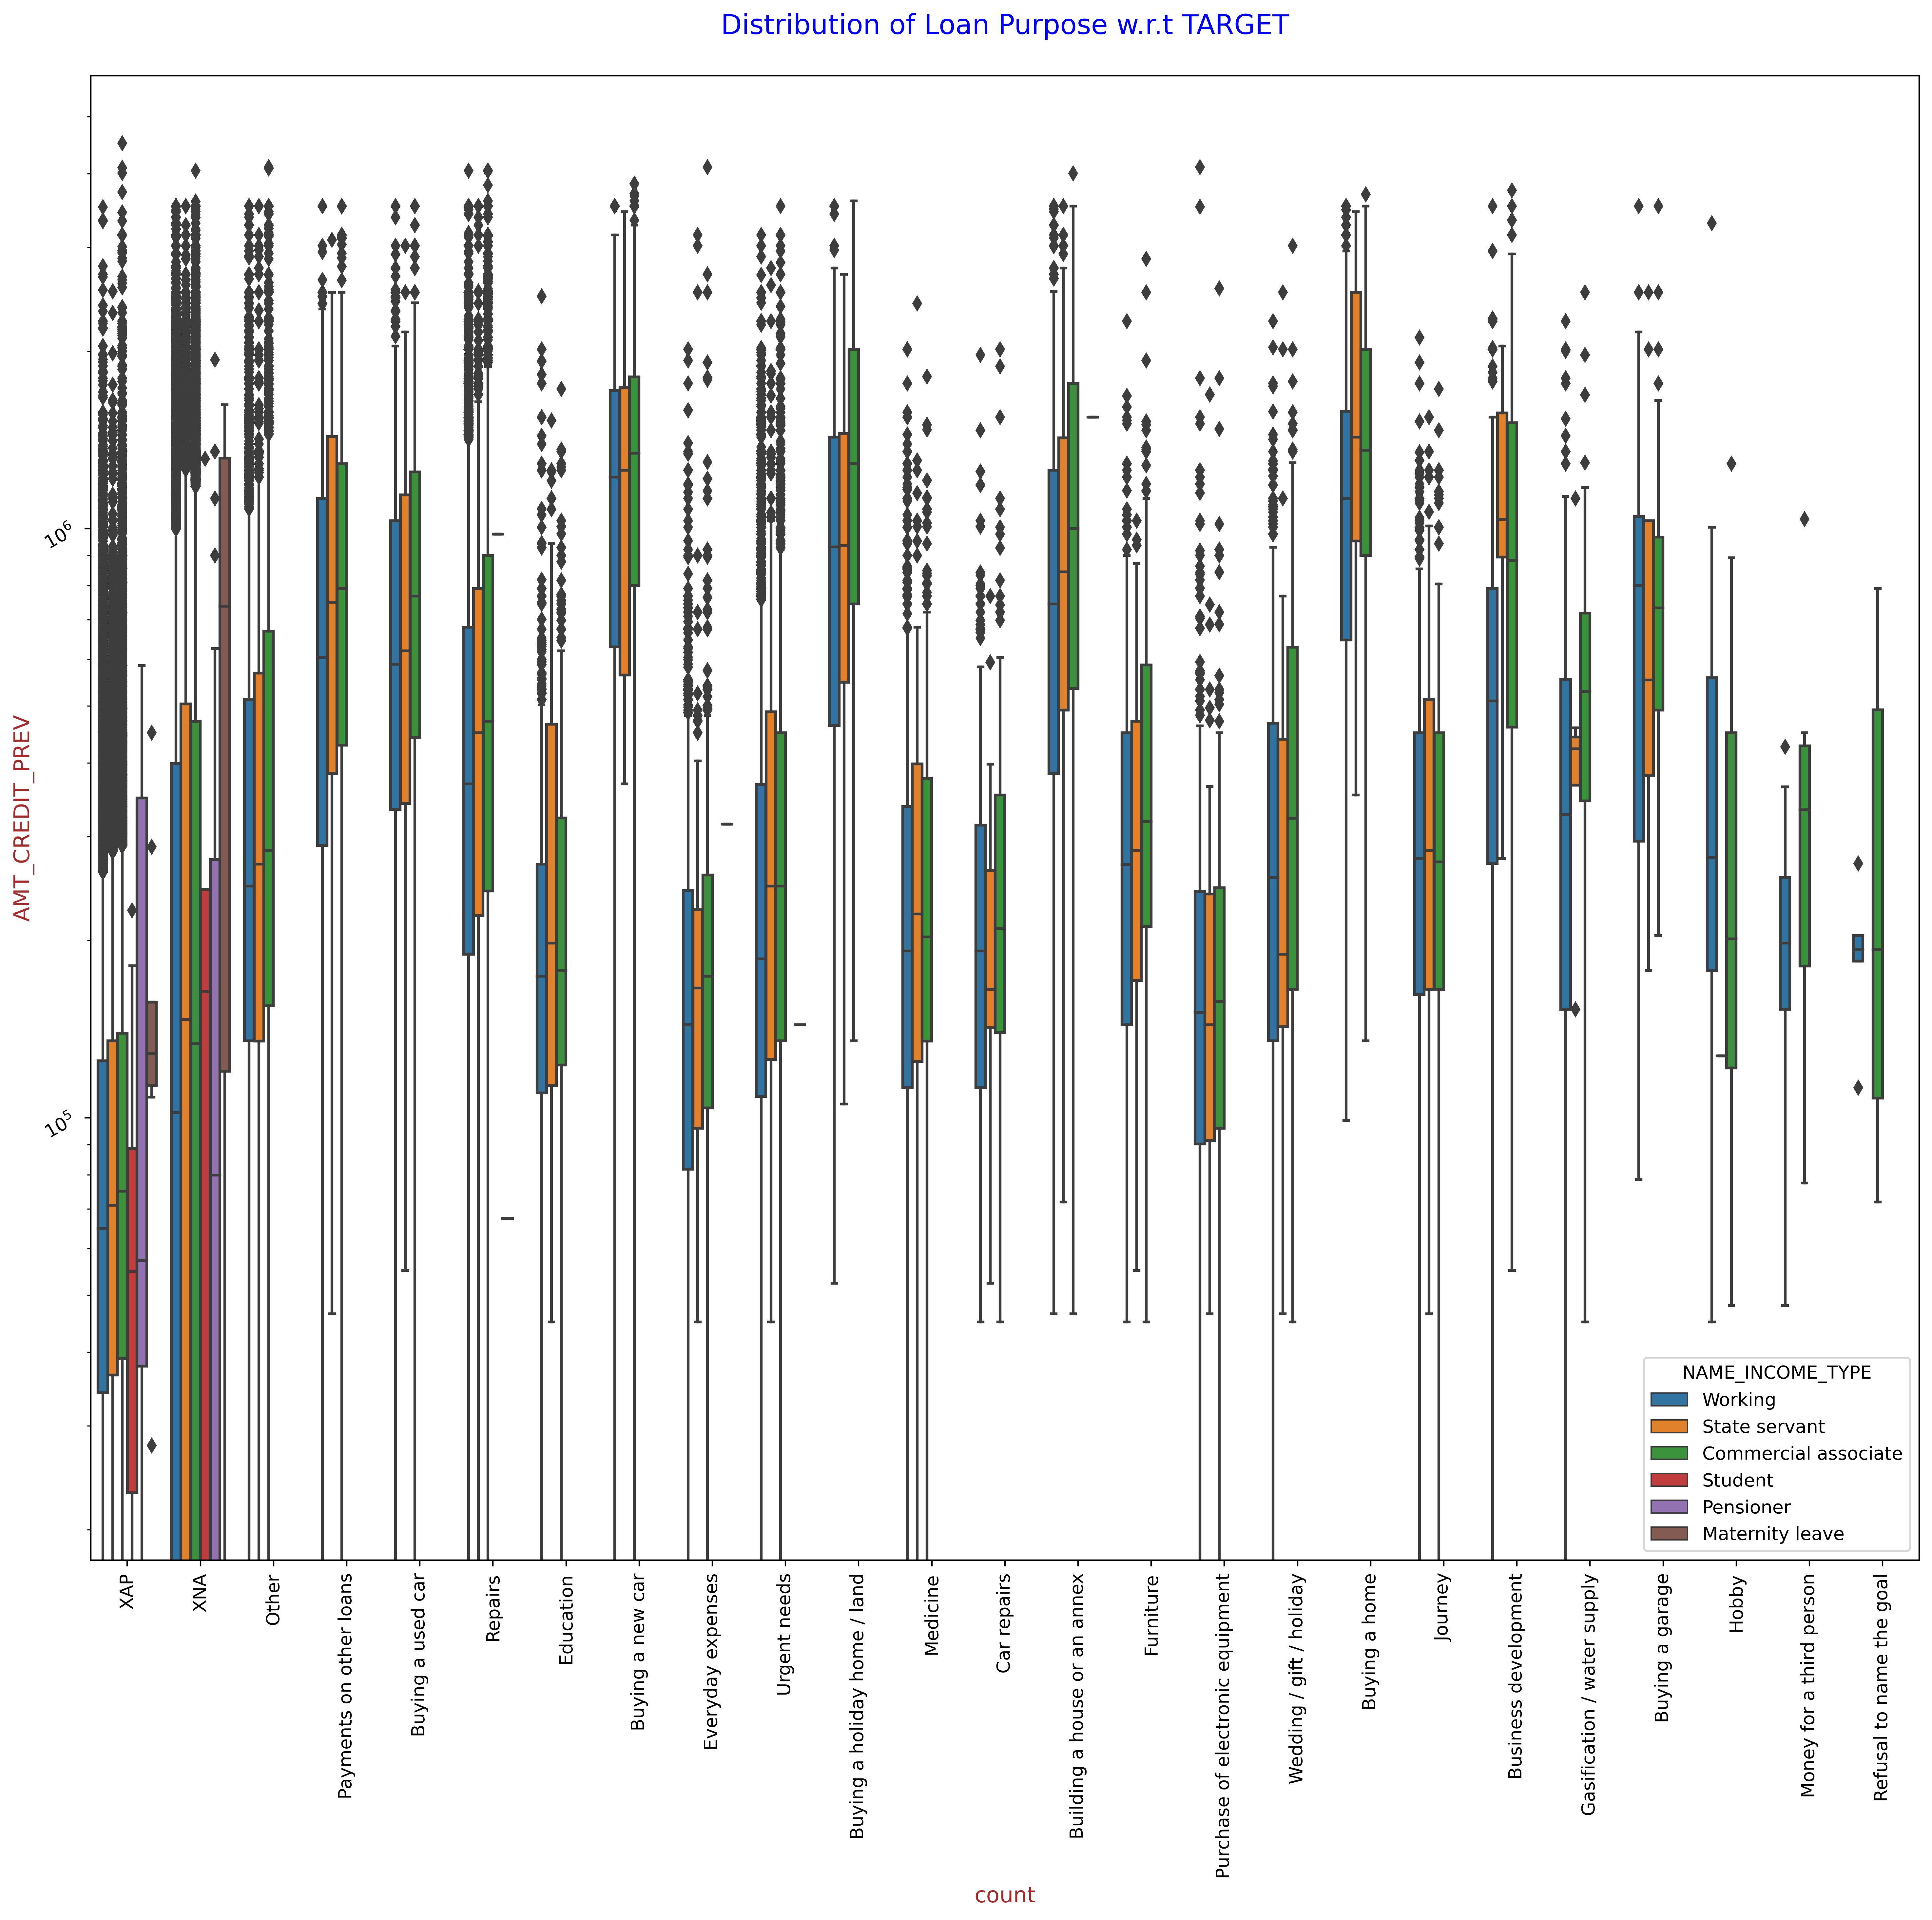

In [221]:
#Checking for Amount credited previously against Purpose of loan with respect to 
plt.figure(figsize=(18,15),dpi=400)
sns.boxplot(data=mergedloandf,y='AMT_CREDIT_PREV',x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylabel("AMT_CREDIT_PREV", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.title('Distribution of Loan Purpose w.r.t TARGET\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

#### Inference 2.10
- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher being a 'commercial associate' and even in general irrespective of income type. 
- Income type of state servants haveing no amount of credit applied for purpose of Money for third person or a Hobby.
- Most of the commercial associates have refuesed to provide purpose of credit

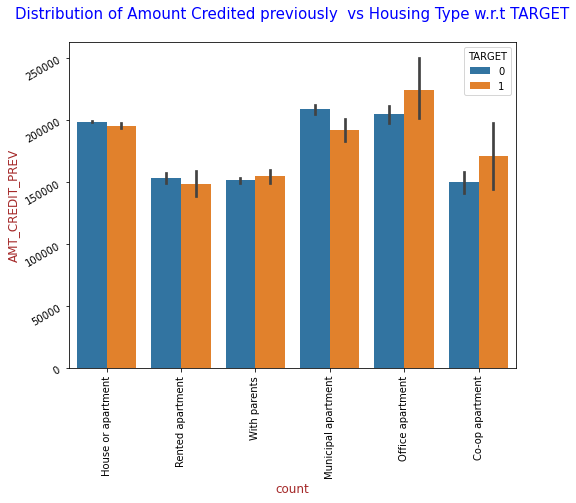

In [222]:
#Checking for Amount Credited vs housing type with respect to target
plt.figure(figsize=(8,6))
sns.barplot(data=mergedloandf,y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.ylabel("AMT_CREDIT_PREV", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.title('Distribution of Amount Credited previously  vs Housing Type w.r.t TARGET\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

#### Inference 2.11
- Here for Housing type, office appartment and co-op apartment are having higher credit of target 1. 
- So, we can conclude that bank should avoid giving loans to the housing type of office appartment and co-op apartment as they are having difficulties in payment. 
- Bank can focus mostly on housing type with parents or House or appartment or muncipal appartment for successful payments.

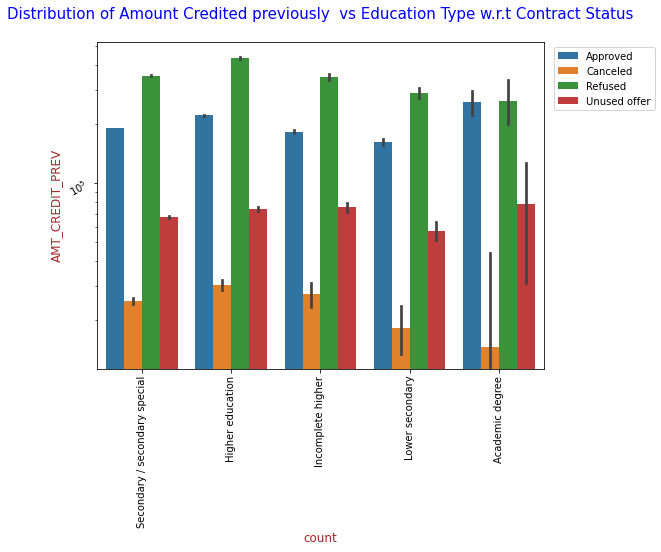

In [223]:
#Checking for Amount Credited vs Education type with respect to Contract Status
plt.figure(figsize=(8,6))
sns.barplot(data=mergedloandf,y='AMT_CREDIT_PREV',hue='NAME_CONTRACT_STATUS',x='NAME_EDUCATION_TYPE')
plt.xticks(rotation=90)
plt.ylabel("AMT_CREDIT_PREV", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.xlabel("count", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.yticks(rotation=30)
plt.yscale('log')
plt.legend(bbox_to_anchor=(1.26,1))
plt.title('Distribution of Amount Credited previously  vs Education Type w.r.t Contract Status\n',fontdict={'fontsize': 15, 'fontweight' : 7, 'color' : 'Blue'})
plt.show()

#### Inference 2.12
- It can be seen that number of refusals are for clients has nothing to do with their educatin levels
- Almost all education level clients have equal unused offers.

### Multivariate Analysis for merged dataframe

In [224]:
#Dropping column named SK_ID_PREV for getting correlation of other columns
mergedloandf1=mergedloandf.drop('SK_ID_PREV', axis=1)

In [225]:
#Calculating the correlations of vaious columns for merged dataframe
mergedloandfcorrelation=mergedloandf1.iloc[:,:].corr()
mergedloandfcorrelation

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_GOODS_PRICE_PREV,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
TARGET,1.000000,0.007227,-0.006403,-0.035072,-0.015500,-0.038953,-0.057811,-0.069775,-0.036055,-0.037906,-0.016124,-0.006941,-0.003928,-0.000491,0.044863,-0.003077,0.031810
CNT_CHILDREN,0.007227,1.000000,-0.005969,-0.015442,0.001629,-0.025896,-0.275305,-0.068875,-0.166468,0.103334,-0.045497,-0.035364,-0.037900,-0.051202,-0.010303,0.000255,-0.041636
AMT_INCOME_TOTAL,-0.006403,-0.005969,1.000000,0.149831,0.186797,0.073107,0.027512,0.015699,-0.012050,0.009827,0.114077,0.067844,0.066528,0.076900,0.001759,0.001692,0.022803
AMT_CREDIT,-0.035072,-0.015442,0.149831,1.000000,0.747152,0.088479,0.149120,0.092493,0.019441,0.019877,0.146192,0.116431,0.113719,0.132831,-0.070723,0.004189,0.040645
AMT_ANNUITY,-0.015500,0.001629,0.186797,0.747152,1.000000,0.103722,0.073540,0.047872,-0.017057,0.008767,0.197812,0.111160,0.106012,0.132090,-0.038934,0.005404,0.002724
REGION_POPULATION_RELATIVE,-0.038953,-0.025896,0.073107,0.088479,0.103722,1.000000,0.055992,0.005673,0.059915,0.008659,0.082527,0.046123,0.046860,0.056313,-0.027730,0.000101,0.001801
DAYS_BIRTH,-0.057811,-0.275305,0.027512,0.149120,0.073540,0.055992,1.000000,0.327184,0.291546,0.088511,0.129280,0.109494,0.113518,0.146624,-0.049625,-0.005503,0.116786
DAYS_EMPLOYED,-0.069775,-0.068875,0.015699,0.092493,0.047872,0.005673,0.327184,1.000000,0.164748,0.074495,0.047573,0.048446,0.049271,0.055908,-0.074931,-0.002158,0.041899
DAYS_REGISTRATION,-0.036055,-0.166468,-0.012050,0.019441,-0.017057,0.059915,0.291546,0.164748,1.000000,0.031518,0.016345,0.019233,0.020848,0.026318,-0.028029,-0.003410,0.026520
DAYS_ID_PUBLISH,-0.037906,0.103334,0.009827,0.019877,0.008767,0.008659,0.088511,0.074495,0.031518,1.000000,0.007174,0.011641,0.012128,0.012577,-0.060363,-0.000598,0.009889


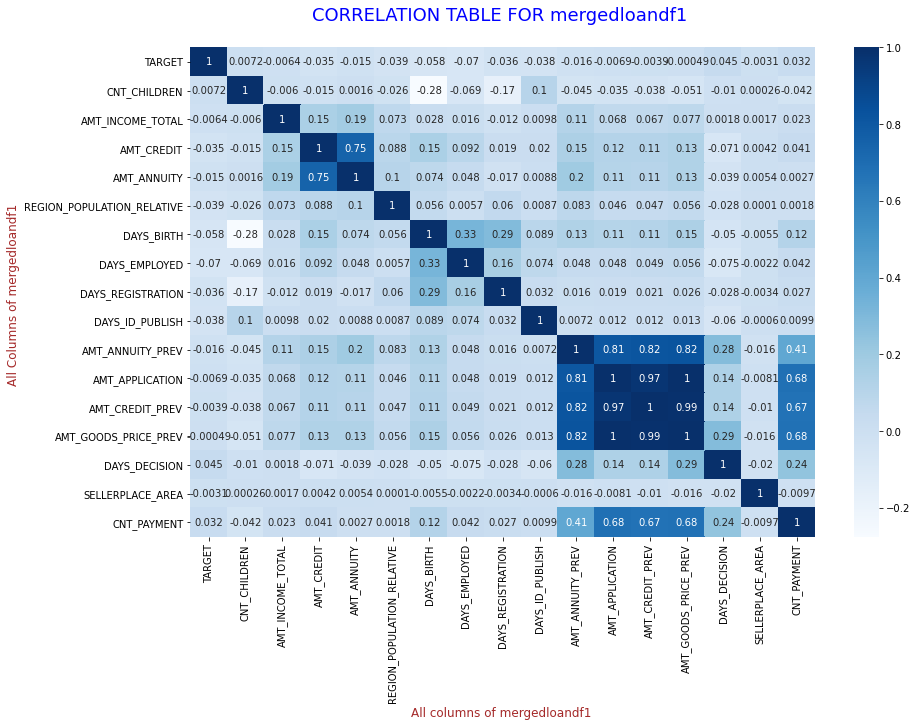

In [232]:
#Plotting a heatmap for correlation obtained above
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(mergedloandfcorrelation, cmap='Blues',annot=True)
plt.title('CORRELATION TABLE FOR mergedloandf1 \n',fontdict={'fontsize': 18, 'fontweight' : 10, 'color' : 'Blue'})
plt.xlabel("All columns of mergedloandf1 ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("All Columns of mergedloandf1 ", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.show()

- We can observe correlations of different variales plotted in the above  graph and draw almost similar inference as we drew in Inference 1.15, with few extra variables

## Final Inference 

1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ and 'office appartment'  for successful payments.
2. Banks should focus less on income types maternity leave and working as they have most number of unsuccessful payments
3. In loan purpose ‘Repairs’:

     1. Although having higher number of rejection in loan purposes with 'Repairs' we can observe difficulties in payment.
     2. There are few places where loan payment diffuculty is significantly high.
     3. Bank should continue to be cautious while giving loan for this purpose.
4. Bank can focus mostly on housing type with parents , House or apartment and municipal apartment with purpuse of education, buying land, buying a garage, purchase of electronic equipment and some other purposes with target0 significantly more than target1 for successful payments.
5. Banks can offer more offers to clients who are students and pensioners as they take all offers and are more likely to pay back 